In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# read csv with BERTopic Clusters
df=pd.read_csv("document_clusters.csv")
# include only unneccessary columns
list_of_cols=(list(df.columns))[:15]+["created_utc","created","score","author"]
df=df[list_of_cols]
df['created_utc'] = pd.to_datetime(df['created_utc'])

In [2]:
df_all = pd.read_csv('data/depression_SG_reddit.csv.gz', compression='gzip')
df_all['created_utc'] = (pd.to_datetime(df_all['created_utc'], unit='s'))
df_all=df_all[["created_utc"]]
df_all.set_index('created_utc', inplace=True)
df_all=df_all.resample('Y').size().fillna(0)
df_all=df_all[df_all.index >= '2015-01-01']
df_all=pd.DataFrame(df_all)
df_all=df_all.rename(columns={0: 'Mental health related posts'})
df_all

C:\Users\charl\AppData\Local\Temp\ipykernel_3608\2043583818.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_all=df_all.resample('Y').size().fillna(0)


,Mental health related posts
created_utc,
2015-12-31,86
2016-12-31,104
2017-12-31,119
2018-12-31,214
2019-12-31,319
2020-12-31,539
2021-12-31,661
2022-12-31,841


In [3]:
def clean_topic_representation(topic):
    '''
    Parameters:
        topic (str): topic number obtained from BERTopic
    Returns:
        A string from this format: 0_psychiatrist_seek_affordable_attacks to Topic 0: psychiatrist, seek, affordable, attacks
    '''
    parts = topic.split('_')
    # The first part is the numeric index
    index = parts[0]
    # The remaining parts are the words
    words = ', '.join(parts[1:])
    # Format the output as required
    formatted = f"Topic {index}: {words}"
    return(formatted)
df["Name"]=df["Name"].apply(clean_topic_representation)

In [4]:
df_all_time=pd.read_csv('data/data_SG_reddit.csv.gz', compression='gzip', index_col=False)
df_all_time=df_all_time[["created_utc"]]
df_all_time["created_utc"]=pd.to_datetime(df_all_time['created_utc'], unit='s')
df_all_time.set_index('created_utc', inplace=True)
df_all_time=df_all_time[df_all_time.index >= '2015-01-01']
print(len(df_all_time))
df_all_time = df_all_time.resample('Y').size().fillna(0)
df_all_time=pd.DataFrame(df_all_time)
df_all_time=df_all_time.rename(columns={0: 'total_counts'})



df.set_index('created_utc', inplace=True)
df_resampled = df.groupby('Name').resample('YE').size().unstack(level=0).fillna(0)

C:\Users\charl\AppData\Local\Temp\ipykernel_3608\205249686.py:1: DtypeWarning: Columns (1,4,8,12,16,17,19,21,26,30,32,34,35,38,39,40,41,42,43,44,45,46,47,51,54,55,57,58,59,60,61,62,66,67,68,69,72,73,74,77,79,81,82,83,84,85,91,92,93,94,96,97,99,100,101,102,103,104,105,106,107,109,110,111,112,113,115,116,118,120,121,123,124,126,128,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_time=pd.read_csv('data/data_SG_reddit.csv.gz', compression='gzip', index_col=False)


379787


C:\Users\charl\AppData\Local\Temp\ipykernel_3608\205249686.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_all_time = df_all_time.resample('Y').size().fillna(0)


In [5]:
df_all_time

,total_counts
created_utc,
2015-12-31,12039
2016-12-31,15608
2017-12-31,23941
2018-12-31,38274
2019-12-31,59659
2020-12-31,82693
2021-12-31,75004
2022-12-31,72569


In [6]:
df_resampled = pd.merge(df_all_time, df_resampled, left_index=True, right_index=True)
topic_cols=[i for i in list(df_resampled.columns) if i!="total_counts"]
df_resampled[topic_cols] = df_resampled[topic_cols].div(df_resampled['total_counts'], axis=0)
df_resampled=df_resampled.drop(columns=['total_counts'], axis=1)
df_resampled=df_resampled.mul(1000)
df_resampled

,"Topic -1: man, help, singaporeans, amp","Topic 0: loneliness, like, sad, destined","Topic 1: imh, help, affordable, bipolar","Topic 2: poly, gpa, secondary, fresh","Topic 3: internship, sg, just, resignation","Topic 4: coronavirus, migrant, measures, pfizer","Topic 5: attacks, eating, ptsd, antidepressants","Topic 6: pes, nsf, bunk, depression","Topic 7: heard, shes, assaulted, families","Topic 8: breakup, attachment, unavailable, sensitive","Topic 9: scam, valuing, transactions, ocbc"
created_utc,,,,,,,,,,,
2015-12-31,5.149929,0.249190,0.249190,0.581444,0.083063,0.000000,0.083063,0.498380,0.083063,0.000000,0.000000
2016-12-31,3.972322,0.512558,0.512558,0.320349,0.320349,0.000000,0.000000,0.512558,0.320349,0.000000,0.064070
2017-12-31,3.425087,0.208847,0.292385,0.208847,0.208847,0.000000,0.167077,0.334155,0.083539,0.000000,0.000000
2018-12-31,3.579453,0.156764,0.548675,0.313529,0.130637,0.000000,0.182892,0.418038,0.078382,0.052255,0.000000
2019-12-31,3.469720,0.268191,0.368762,0.268191,0.117334,0.033524,0.117334,0.251429,0.050286,0.016762,0.016762
2020-12-31,3.688341,0.447438,0.507903,0.290230,0.253951,0.628832,0.193487,0.108836,0.084650,0.024186,0.000000
2021-12-31,4.746414,0.746627,0.906618,0.373313,0.466642,0.586635,0.293318,0.133326,0.093328,0.053330,0.039998
2022-12-31,6.559275,1.515799,0.799239,0.537420,0.647659,0.385840,0.399620,0.137800,0.110240,0.206700,0.068900


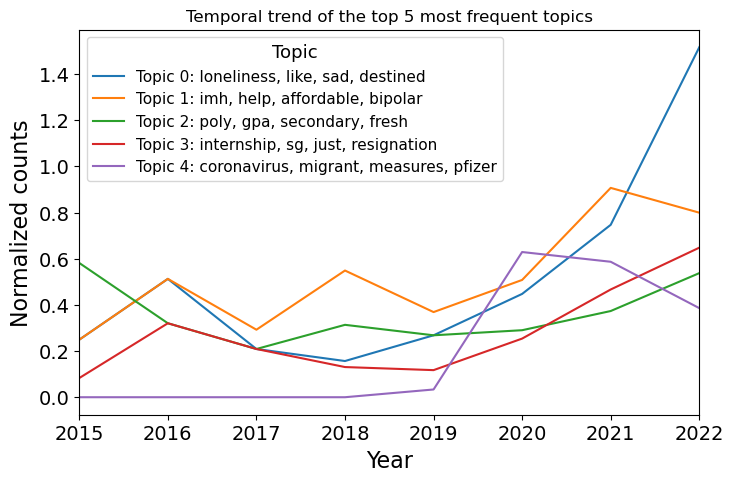

In [7]:
# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()
df_filtered = df_resampled.iloc[:, [1, 2,3, 4, 5]]
df_filtered.plot(ax=ax)

plt.title('Temporal trend of the top 5 most frequent topics')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Normalized counts', fontsize=16)
plt.xticks(fontsize=14)  # Adjust x-axis tick font size
plt.yticks(fontsize=14)  # Adjust y-axis tick font size
plt.legend(title='Topic', fontsize=11, title_fontsize=13)

plt.xticks()  # Rotate for better readability
plt.savefig('plots/plot_topics.png', dpi=900, bbox_inches='tight') 
plt.show()

In [8]:
df_resampled["Social Isolation & Emotional Struggles"]=df_resampled["Topic 0: loneliness, like, sad, destined"]+df_resampled["Topic 8: breakup, attachment, unavailable, sensitive"]
df_resampled["Career & Educational Pressures"]=df_resampled["Topic 2: poly, gpa, secondary, fresh"]+df_resampled["Topic 3: internship, sg, just, resignation"]+df_resampled["Topic 6: pes, nsf, bunk, depression"]
df_resampled["Access & Support to Health Services"]=df_resampled["Topic 1: imh, help, affordable, bipolar"]+df_resampled["Topic 5: attacks, eating, ptsd, antidepressants"]
df_resampled["Tragedies from Personal & Global Events"]=df_resampled["Topic 4: coronavirus, migrant, measures, pfizer"]+df_resampled["Topic 7: heard, shes, assaulted, families"]+df_resampled["Topic 9: scam, valuing, transactions, ocbc"]

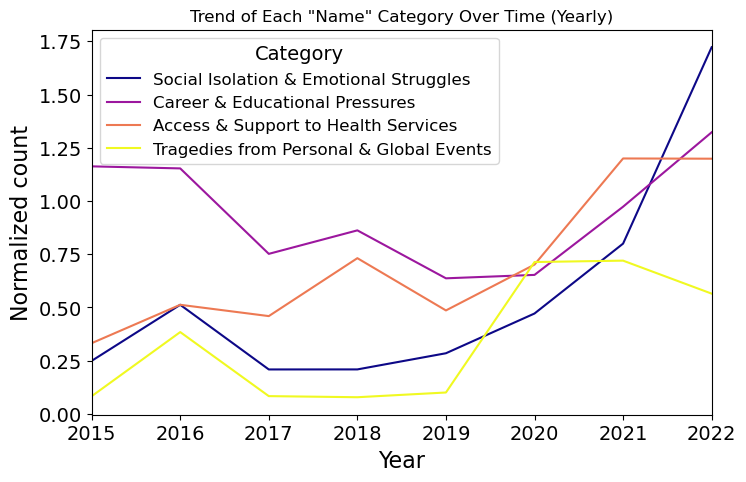

In [9]:
# Assuming 'created_utc' is already in datetime format
# Set 'created_utc' as the index if it isn't already
df_filtered = df_resampled.iloc[:, -4:]

# Plotting
plt.figure(figsize=(8, 5))
ax2 = plt.gca()
df_filtered.plot(ax=ax2, colormap='plasma')

plt.title('Trend of Each "Name" Category Over Time (Yearly)')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Normalized count', fontsize=16)
# Customizing tick label size
plt.xticks(fontsize=14)  # Adjust x-axis tick font size
plt.yticks(fontsize=14)  # Adjust y-axis tick font size
plt.legend(title='Category', fontsize=12, title_fontsize=14)
plt.savefig('plots/plot_categories.png', dpi=900, bbox_inches='tight') 
plt.show()